Using the baby names data set, Using the baby names data set, define a pandas object called names_data that includes all the years.

HINT: You should probably do this in a for loop.

In [81]:
%matplotlib inline

from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Look pretty!
matplotlib.style.use('ggplot')

In [7]:
# The data is stored as CSV's in individual .txt files, one for each year from 1880-2015.
# Each file contains a list of names, with the sex and number of births.

years = range(1880, 2016)

a = []

for year in years:
    path = 'names/yob%d.txt' %year
    df = pd.read_csv(path, names = ['names', 'sex', 'births'])
    df['year'] = year
    a.append(df)

# a is now a list of DataFrames which need to be merged into a single giant DataFrame.
names_data = pd.concat(a, ignore_index = True)
#print names_data

             names sex  births  year
0             Mary   F    7065  1880
1             Anna   F    2604  1880
2             Emma   F    2003  1880
3        Elizabeth   F    1939  1880
4           Minnie   F    1746  1880
5         Margaret   F    1578  1880
6              Ida   F    1472  1880
7            Alice   F    1414  1880
8           Bertha   F    1320  1880
9            Sarah   F    1288  1880
10           Annie   F    1258  1880
11           Clara   F    1226  1880
12            Ella   F    1156  1880
13        Florence   F    1063  1880
14            Cora   F    1045  1880
15          Martha   F    1040  1880
16           Laura   F    1012  1880
17          Nellie   F     995  1880
18           Grace   F     982  1880
19          Carrie   F     949  1880
20           Maude   F     858  1880
21           Mabel   F     808  1880
22          Bessie   F     796  1880
23          Jennie   F     793  1880
24        Gertrude   F     787  1880
25           Julia   F     783  1880
2

Using the names_data object you just created, generate the following items:

 The most popular male and female name in your birth year

 The number of people born with your name in the same year (note, if you have a somewhat uncommon name, this may not appear.
For example, someone’s name is Shannen and due to its irregular spelling, wasn’t reported for her birth year)

 A plot of the number of instances of your name over time.

 A plot of the number of the total boy names and the number of girls names each year.

 A plot showing the fraction of male and female babies given a name similar to Lesley. By similar I mean the name starts with ‘lesl’ (make sure you make the name lowercase).

In [19]:
print "Most popular female name in 1986:"
print names_data[(names_data.year == 1986) & (names_data.sex == 'F')].sort_values('births', ascending = False)[:1]
print "---------------------------------"
print "Most popular male name in 1986:"
print names_data[(names_data.year == 1986) & (names_data.sex == 'M')].sort_values('births', ascending = False)[:1]

Most popular female name in 1986:
          names sex  births  year
981333  Jessica   F   52667  1986
---------------------------------
Most popular male name in 1986:
          names sex  births  year
994151  Michael   M   64188  1986


In [20]:
print "Number of people born with name 'Arjun' in 1986:"
print names_data[(names_data.year == 1986) & (names_data.names == 'Arjun')]

Number of people born with name 'Arjun' in 1986:
        names sex  births  year
996443  Arjun   M      24  1986


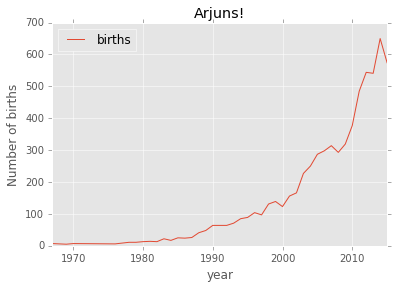

In [82]:
# A plot of the number of instances of your name over time.
arjun_names = names_data[(names_data.names == 'Arjun')]
arjun_names.plot(x = 'year', y = 'births')
plt.ylabel("Number of births")
plt.title("Arjuns!")

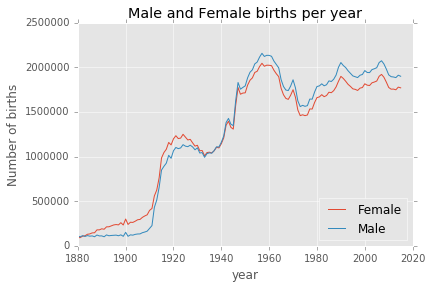

In [83]:
# A plot of the number of the total boy names and the number of girls names each year.
# In other words, the number of female and male births per year.

total_fm_births = names_data.pivot_table('births', index = 'year', columns = 'sex', aggfunc = 'sum')
plt.plot(total_fm_births.index, total_fm_births.F, label = 'Female')
plt.plot(total_fm_births.index, total_fm_births.M, label = 'Male')
plt.title("Male and Female births per year")
plt.legend(loc = 'lower right')
plt.xlabel("year")
plt.ylabel("Number of births")
plt.show()

In [69]:
# A plot showing the fraction of male and female babies given a name similar to Lesley. By similar I mean the
# name starts with ‘lesl’ (make sure you make the name lowercase).

unique_names = names_data.names.unique()
lesl_mask = np.array([x.lower().startswith('lesl') for x in unique_names])
like_lesl = unique_names[lesl_mask]
print like_lesl # List of male and female names starting with "Lesl" (not just containing "Lesl"!!)

['Leslie' 'Lesley' 'Lesly' 'Leslye' 'Leslee' 'Lesli' 'Leslyn' 'Lesle'
 'Lesleigh' 'Leslea' 'Leslieann' 'Lesleyann' 'Lesleyanne' 'Leslianne'
 'Leslieanne' 'Lesliann' 'Leslei' 'Leslian' 'Lesliee' 'Leslyann' 'Leslly']


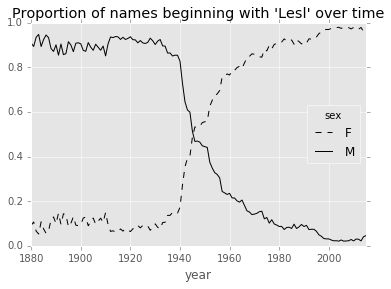

In [84]:
filtered_lesl = names_data[names_data.names.isin(like_lesl)]
lesl_table = filtered_lesl.pivot_table('births', index = 'year', columns = 'sex', aggfunc = 'sum')
lesl_table = lesl_table.div(lesl_table.sum(1), axis=0)
#print lesl_table.head(8)
lesl_table.plot(style={'M': 'k-', 'F': 'k--'})
plt.title("Proportion of names beginning with 'Lesl' over time")